# MLP Using Mnist Dataset

## Imports and stuff

In [1]:
cd ../../

/home/vpoglioni/Documentos/Repos/neural-networks


In [55]:
from utils.data_manipulation import Data
from utils.data_visualization import DataViz
from utils.model import ModelUtils

In [56]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD
from keras import regularizers
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

## Dataset Visualization

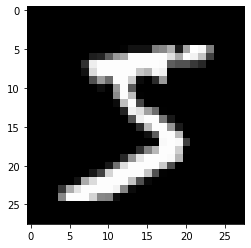

In [57]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
plt.imshow(x_train[0], cmap="gray")
plt.show()

## Data Manipulation
Normalize and flatten the arrays

In [58]:
def flatten_all(input_data):
    new_data = []
    for data in input_data:
        new_data.append(data.flatten())
    return np.array(new_data)

x_train = flatten_all(Data.normalize_data(x_train, 255))
# y_train = flatten_all(Data.normalize_data(y_train, 255))
x_test = flatten_all(Data.normalize_data(x_test, 255))
# y_test = flatten_all(Data.normalize_data(y_test, 255))

input_shape = x_train[0].shape[0]

## Models

Fixed 20 epochs to test all models

In [59]:
def create_model(input_shape, optimizer, hidden_dim, activation, num_classes, regularizer=None):
    input_img = Input(shape=(input_shape,))
    if regularizer:
        hidden = Dense(hidden_dim, activation=activation,
                       activity_regularizer=regularizers.l2(regularizer))(input_img)
    hidden = Dense(hidden_dim, activation=activation)(input_img)
    output = Dense(num_classes, activation='softmax')(hidden)

    mlp = Model(input_img, output)

    mlp.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

    return mlp

def run_model(model):
    model_train = model.fit(
        x_train, y_train,
        epochs=epochs,
        batch_size=50,
        shuffle=True,
        validation_data=(x_test, y_test))
    DataViz.plot_loss(
        model_train.history['loss'],
        model_train.history['val_loss'],
        range(epochs)
    )

epochs = 20
classes = 10

### Base Model 1
Base model, for comparison
Features:
- SGD optimizer
- 1 hidden layer of shape 64
- Learning rate = 0.01
- Batch size = 50
- Relu on hidden and softmax on output

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.8291 - acc: 0.7846 - val_loss: 0.4334 - val_acc: 0.8879
Epoch 2/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.4007 - acc: 0.8898 - val_loss: 0.3434 - val_acc: 0.9063
Epoch 3/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.3405 - acc: 0.9043 - val_loss: 0.3070 - val_acc: 0.9143
Epoch 4/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.3089 - acc: 0.9132 - val_loss: 0.2852 - val_acc: 0.9194
Epoch 5/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.2865 - acc: 0.9191 - val_loss: 0.2673 - val_acc: 0.9247
Epoch 6/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.2682 - acc: 0.9246 - val_loss: 0.2541 - val_acc: 0.9283
Epoch 7/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.2529 - acc: 0.9288 - val_loss: 0.2424 - val_acc

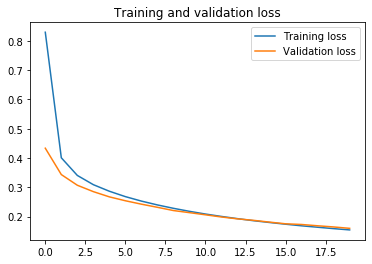

In [60]:
from keras.utils.vis_utils import plot_model
mlp = create_model(
    input_shape,
    SGD(
        lr=0.01
    ),
    64,
    "relu",
    classes)
plot_model(mlp, show_shapes=True, show_layer_names=True)

run_model(mlp)

### Base Model 2
Base model, for comparison
Features:
- SGD optimizer
- 1 hidden layer of shape 128
- Learning rate = 0.01
- Batch size = 50
- Relu on hidden and softmax on output

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.7917 - acc: 0.8036 - val_loss: 0.4134 - val_acc: 0.8914
Epoch 2/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.3855 - acc: 0.8955 - val_loss: 0.3281 - val_acc: 0.9104
Epoch 3/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.3269 - acc: 0.9086 - val_loss: 0.2922 - val_acc: 0.9173
Epoch 4/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.2948 - acc: 0.9170 - val_loss: 0.2697 - val_acc: 0.9239
Epoch 5/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.2717 - acc: 0.9238 - val_loss: 0.2511 - val_acc: 0.9292
Epoch 6/20
60000/60000 [==============================] - 5s 91us/step - loss: 0.2533 - acc: 0.9286 - val_loss: 0.2372 - val_acc: 0.9343
Epoch 7/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.2379 - acc: 0.9333 - val_loss: 0.2234 - val_ac

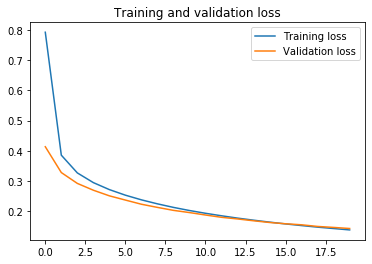

In [61]:
from keras.utils.vis_utils import plot_model
mlp = create_model(
    input_shape,
    SGD(
        lr=0.01
    ),
    128,
    "relu",
    classes)
plot_model(mlp, show_shapes=True, show_layer_names=True)

run_model(mlp)

### Model 2
Added l2 active regularization to base model 1
Features:
- SGD optimizer
- 1 hidden layer of shape 64
- Learning rate = 0.01
- Batch size = 50
- Relu on hidden and softmax on output
- l2 regularizer=10e-2

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.7946 - acc: 0.8049 - val_loss: 0.4239 - val_acc: 0.8895
Epoch 2/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.3926 - acc: 0.8931 - val_loss: 0.3418 - val_acc: 0.9040
Epoch 3/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.3365 - acc: 0.9064 - val_loss: 0.3057 - val_acc: 0.9147
Epoch 4/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.3060 - acc: 0.9144 - val_loss: 0.2843 - val_acc: 0.9199
Epoch 5/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.2848 - acc: 0.9206 - val_loss: 0.2675 - val_acc: 0.9254
Epoch 6/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.2677 - acc: 0.9259 - val_loss: 0.2544 - val_acc: 0.9282
Epoch 7/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.2534 - acc: 0.9297 - val_loss: 0.2431 - val_acc

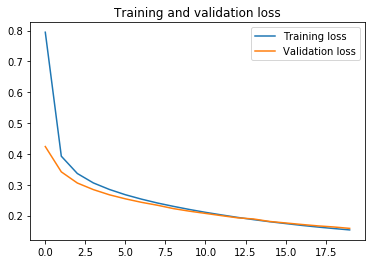

In [62]:
from keras.utils.vis_utils import plot_model
mlp = create_model(
    input_shape,
    SGD(
        lr=0.01
    ),
    64, 
    "relu",
    classes,
    regularizer=10e-2)
plot_model(mlp, show_shapes=True, show_layer_names=True)

run_model(mlp)

### Model 3
Lower regularization from model 2
Features:
- SGD optimizer
- 1 hidden layer of shape 64
- Learning rate = 0.01
- Batch size = 50
- Relu on hidden and softmax on output
- l2 regularizer = 10e-6

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.7667 - acc: 0.8082 - val_loss: 0.4130 - val_acc: 0.8922
Epoch 2/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.3838 - acc: 0.8954 - val_loss: 0.3349 - val_acc: 0.9078
Epoch 3/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.3301 - acc: 0.9072 - val_loss: 0.3007 - val_acc: 0.9156
Epoch 4/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.3013 - acc: 0.9142 - val_loss: 0.2796 - val_acc: 0.9217
Epoch 5/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.2809 - acc: 0.9201 - val_loss: 0.2656 - val_acc: 0.9232
Epoch 6/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.2645 - acc: 0.9255 - val_loss: 0.2502 - val_acc: 0.9289
Epoch 7/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.2506 - acc: 0.9289 - val_loss: 0.2390 - val_acc

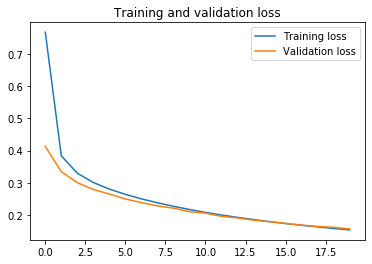

In [63]:
from keras.utils.vis_utils import plot_model
mlp = create_model(
    input_shape,
    SGD(
        lr=0.01
    ),
    64, 
    "relu", 
    classes,
    regularizer=10e-6)
plot_model(mlp, show_shapes=True, show_layer_names=True)

run_model(mlp)

### Model 4
Add momentum to base model 1
Features:
- SGD optimizer
- 1 hidden layer of shape 64
- Learning rate = 0.01
- Batch size = 50
- Relu on hidden and softmax on output
- momentum = 0.1

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.8040 - acc: 0.7957 - val_loss: 0.4131 - val_acc: 0.8883
Epoch 2/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.3861 - acc: 0.8945 - val_loss: 0.3312 - val_acc: 0.9091
Epoch 3/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.3312 - acc: 0.9074 - val_loss: 0.3007 - val_acc: 0.9141
Epoch 4/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.3023 - acc: 0.9153 - val_loss: 0.2799 - val_acc: 0.9217
Epoch 5/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.2817 - acc: 0.9210 - val_loss: 0.2618 - val_acc: 0.9253
Epoch 6/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.2652 - acc: 0.9258 - val_loss: 0.2504 - val_acc: 0.9289
Epoch 7/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.2517 - acc: 0.9297 - val_loss: 0.2398 - val_acc

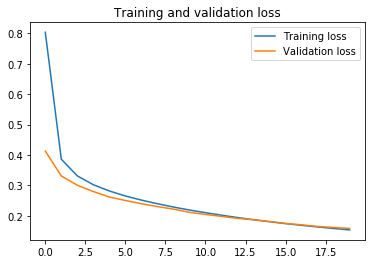

In [64]:
mlp = create_model(
    input_shape,
    SGD(
        lr=0.01,
        momentum=0.1
    ),
    64, 
    "relu", 
    classes)
plot_model(mlp, show_shapes=True, show_layer_names=True)

run_model(mlp)

### Model 5
Increase momentum on model 4
Features:
- SGD optimizer
- 1 hidden layer of shape 64
- Learning rate = 0.01
- Batch size = 50
- Relu on hidden and softmax on output
- momentum = 0.3

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.7047 - acc: 0.8178 - val_loss: 0.3728 - val_acc: 0.9015
Epoch 2/20
60000/60000 [==============================] - 3s 50us/step - loss: 0.3518 - acc: 0.9024 - val_loss: 0.3039 - val_acc: 0.9159
Epoch 3/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.3033 - acc: 0.9147 - val_loss: 0.2776 - val_acc: 0.9229
Epoch 4/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.2756 - acc: 0.9224 - val_loss: 0.2562 - val_acc: 0.9281
Epoch 5/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.2548 - acc: 0.9274 - val_loss: 0.2416 - val_acc: 0.9313
Epoch 6/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.2385 - acc: 0.9325 - val_loss: 0.2265 - val_acc: 0.9378
Epoch 7/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.2246 - acc: 0.9361 - val_loss: 0.2155 - val_acc

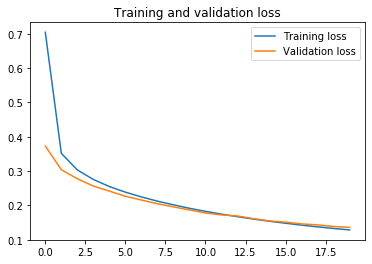

In [65]:
mlp = create_model(
    input_shape,
    SGD(
        lr=0.01,
        momentum=0.3
    ),
    64, 
    "relu", 
    classes)
plot_model(mlp, show_shapes=True, show_layer_names=True)

run_model(mlp)

### Model 6
Join models 2 and 5
Features:
- SGD optimizer
- 1 hidden layer of shape 64
- Learning rate = 0.01
- Batch size = 50
- Relu on hidden and softmax on output
- momentum = 0.3
- l2 regularizer = 10e-02

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.7041 - acc: 0.8202 - val_loss: 0.3708 - val_acc: 0.9018
Epoch 2/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.3527 - acc: 0.9018 - val_loss: 0.3019 - val_acc: 0.9177
Epoch 3/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.3033 - acc: 0.9142 - val_loss: 0.2731 - val_acc: 0.9238
Epoch 4/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.2728 - acc: 0.9234 - val_loss: 0.2491 - val_acc: 0.9307
Epoch 5/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.2503 - acc: 0.9297 - val_loss: 0.2315 - val_acc: 0.9353
Epoch 6/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.2318 - acc: 0.9351 - val_loss: 0.2180 - val_acc: 0.9380
Epoch 7/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.2166 - acc: 0.9395 - val_loss: 0.2034 - val_acc

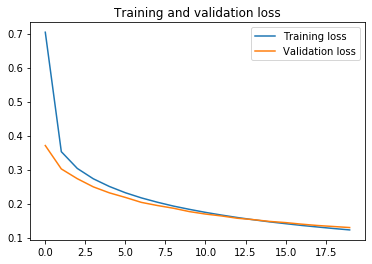

In [66]:
mlp = create_model(
    input_shape,
    SGD(
        lr=0.01,
        momentum=0.3
    ),
    64, 
    "relu", 
    classes,
    regularizer=10e-02)
plot_model(mlp, show_shapes=True, show_layer_names=True)

run_model(mlp)

### Model 7
Added configuration from model 6 to base model 2
Features:
- SGD optimizer
- 1 hidden layer of shape 128
- Learning rate = 0.01
- Batch size = 50
- Relu on hidden and softmax on output
- momentum = 0.3
- l2 regularizer = 10e-02

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 103us/step - loss: 0.6731 - acc: 0.8286 - val_loss: 0.3723 - val_acc: 0.8975
Epoch 2/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.3482 - acc: 0.9019 - val_loss: 0.3039 - val_acc: 0.9137
Epoch 3/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.3000 - acc: 0.9154 - val_loss: 0.2736 - val_acc: 0.9225
Epoch 4/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.2708 - acc: 0.9241 - val_loss: 0.2510 - val_acc: 0.9287
Epoch 5/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.2484 - acc: 0.9299 - val_loss: 0.2347 - val_acc: 0.9336
Epoch 6/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.2304 - acc: 0.9355 - val_loss: 0.2200 - val_acc: 0.9384
Epoch 7/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.2149 - acc: 0.9404 - val_loss: 0.2052 - val_ac

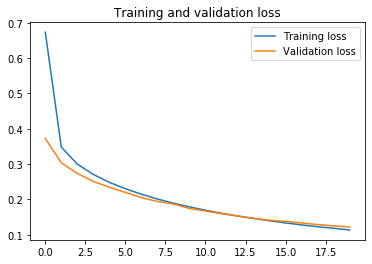

In [67]:
mlp = create_model(
    input_shape,
    SGD(
        lr=0.01,
        momentum=0.3
    ),
    128,
    "relu", 
    classes,
    regularizer=10e-02)
plot_model(mlp, show_shapes=True, show_layer_names=True)

run_model(mlp)

### Model 8
Increased learning rate to 0.1 using model 7 as baseline (with lower regularization)
Features:
- SGD optimizer
- 1 hidden layer of shape 128
- Learning rate = 0.1
- Batch size = 50
- Relu on hidden and softmax on output
- momentum = 0.3
- l2 regularizer = 10e-12

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.3107 - acc: 0.9107 - val_loss: 0.1754 - val_acc: 0.9480
Epoch 2/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.1528 - acc: 0.9558 - val_loss: 0.1280 - val_acc: 0.9607
Epoch 3/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.1100 - acc: 0.9683 - val_loss: 0.0999 - val_acc: 0.9704
Epoch 4/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.0857 - acc: 0.9753 - val_loss: 0.0910 - val_acc: 0.9726
Epoch 5/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.0706 - acc: 0.9788 - val_loss: 0.0796 - val_acc: 0.9755
Epoch 6/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.0602 - acc: 0.9822 - val_loss: 0.0743 - val_acc: 0.9770
Epoch 7/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0515 - acc: 0.9854 - val_loss: 0.0781 - val_ac

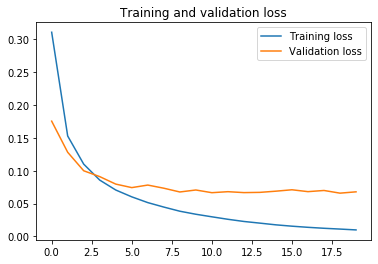

In [68]:
mlp = create_model(
    input_shape,
    SGD(
        lr=0.1,
        momentum=0.3
    ),
    128,
    "relu", 
    classes,
    regularizer=10e-12)
plot_model(mlp, show_shapes=True, show_layer_names=True)

run_model(mlp)

### Model 9
Increased regularization from model 8 (try to reduce overfitting)
Features:
- SGD optimizer
- 1 hidden layer of shape 128
- Learning rate = 0.1
- Batch size = 50
- Relu on hidden and softmax on output
- momentum = 0.3
- l2 regularizer = 10e-01

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.3111 - acc: 0.9106 - val_loss: 0.1776 - val_acc: 0.9472
Epoch 2/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.1515 - acc: 0.9556 - val_loss: 0.1286 - val_acc: 0.9604
Epoch 3/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.1089 - acc: 0.9684 - val_loss: 0.0985 - val_acc: 0.9702
Epoch 4/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.0851 - acc: 0.9755 - val_loss: 0.0907 - val_acc: 0.9723
Epoch 5/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0703 - acc: 0.9800 - val_loss: 0.0856 - val_acc: 0.9738
Epoch 6/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0595 - acc: 0.9832 - val_loss: 0.0752 - val_acc: 0.9750
Epoch 7/20
60000/60000 [==============================] - 4s 59us/step - loss: 0.0515 - acc: 0.9851 - val_loss: 0.0726 - val_ac

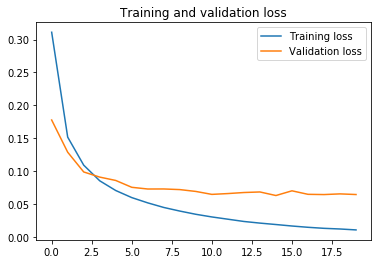

In [69]:
mlp = create_model(
    input_shape,
    SGD(
        lr=0.1,
        momentum=0.3
    ),
    128,
    "relu", 
    classes,
    regularizer=10e-02)
plot_model(mlp, show_shapes=True, show_layer_names=True)

run_model(mlp)

## Conclusions

Using base models 1 and 2 as a baseline for comparison, the models 2 to 8 where used to show the impact of l2 regularizer and momentum on the networks (learning rate and hidden layer size too, more on that later).

Given the results, using the l2 regularization term on the hidden layer, when using a slower learning rate (0.01) gives no apparent results, only a small loss of accuracy on model 2. When using a higher learning rate on model 8, the overfitting is very noticeable, even using a small regularization term. When the regularization term is bumped up on model 9 (by a high margin), the validation loss suffers a small decrease, but enough to see this parameter action in reducing overfitting.

Looking at the results on using momentum, increasing it in model 5 gives a slight better final accuracy, without a penalty to validation loss, showing it's importance on accelerating the gradient pace on finding the optimal point.

Looking at the models 7, 8 and 9, is clear that 128 units on the hidden layer is better to the final accuracy, but increasing the learning rate gives an overfitting model, even though it has a much higher accuracy (not relevant because it's overfitting).

In conclusion, l2 regularizer helped to reduce the overfitting a little, momentum helped to bump up the accuracy faster, more units in hidden layer (in this case) helped the final accuracy increase and increasing the learning rate, even though giving a much better accuracy, overfitted a lot.